<a href="https://colab.research.google.com/github/TanTheta11/Netflix-analysis/blob/main/netflix_shows_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1J4jM8uo-SF-KnpRRr4wiz7I6-hlOXu2i')

# Netflix an(alytics)d Chill



Recent times have witnessed a rise in the use of *OTT platforms* for catering to the entertainment needs of viewers. A stable internet connection and a subscription to one's desired online platform is all you need to treat yourself to a movie or a web series of your choice.

**Netflix** is one of the most popular names on the list of trending OTT platforms. In this project, we'll be looking at some of Netflix's Statistics and gain some insight on the same. We'll be using a [.csv file](https://www.kaggle.com/shivamb/netflix-shows) from [Kaggle](https://www.kaggle.com) for the same.


We'll be using the following Python Libraries for the analysis: 
* numpy
* pandas
* matplotlib
* Seaborn

I'll be implementing the concepts i have learnt from the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com) in this project.

## Downloading the Dataset



Let's download the dataset and explore the contents of the files. We will be using the [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows) dataset from [Kaggle](https://www.kaggle.com). 

We will be using Python's `opendatasets` library to download the dataset.

In [ ]:
!pip install opendatasets --upgrade -q

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows'
od.download('https://www.kaggle.com/shivamb/netflix-shows')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tanhasanthosh
Your Kaggle Key: ··········


100%|██████████| 971k/971k [00:00<00:00, 53.7MB/s]

The dataset has been downlaoded and extracted.

In [ ]:
data_dir = './netflix-shows'

Let's check if the downloaded file exists in the directory.

In [ ]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

## Data Preparation and Cleaning
We'll now explore the contents of the .`csv` file using the `Pandas` library.



In [ ]:
import pandas as pd

Let's store the unprocessed csv files as a raw file.

In [ ]:
netflix_raw = pd.read_csv('./netflix-shows/netflix_titles.csv')
netflix_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [ ]:
netflix_raw.shape

(6234, 12)

As seen above, we get to know there are 6234 rows and 12 columns in the file.

In [ ]:
netflix_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
netflix_raw.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Notice that some of the columns above (`director`, `cast`, `country`, `date_added`, `rating`) contain `NaN` values. Hence the raw file requires some cleaning.


We'll make a copy of the original data for the same and do the required cleaning on that dataset.


In [ ]:
netflix_df = netflix_raw.copy()
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Let's begin with Cleaning the data. First, let's replace the `NaN` values in `director`, `cast` and `country` with the label `"Unknown"`. We'll take help of the `numpy` library.

In [ ]:
import numpy as np

In [ ]:
netflix_df['country'].replace(np.nan, 'Unknown',inplace  = True)
netflix_df['director'].replace(np.nan, 'Unknown',inplace  = True)
netflix_df['cast'].replace(np.nan, 'Unknown',inplace  = True)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,Unknown,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


We have very few null values in `date_added` and `rating` compared to the size of the dataset. Let's drop rows with `NaN` values under `date_added`.

In [ ]:
netflix_df.dropna(inplace=True)
netflix_df = netflix_df.reset_index(drop=True)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6209,80162994,TV Show,Talking Tom and Friends,Unknown,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6210,80186475,TV Show,Pokémon the Series,Unknown,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6211,70272742,TV Show,Justin Time,Unknown,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6212,80067942,TV Show,Terrace House: Boys & Girls in the City,Unknown,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


Let's now check the number of `NaN` values in our dataset.

In [ ]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now that we have dealt with the `NaN` values let's deal with the `date_added` column and convert it's datatype.

In [ ]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'])
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6214 non-null   int64         
 1   type          6214 non-null   object        
 2   title         6214 non-null   object        
 3   director      6214 non-null   object        
 4   cast          6214 non-null   object        
 5   country       6214 non-null   object        
 6   date_added    6214 non-null   datetime64[ns]
 7   release_year  6214 non-null   int64         
 8   rating        6214 non-null   object        
 9   duration      6214 non-null   object        
 10  listed_in     6214 non-null   object        
 11  description   6214 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 582.7+ KB


As we see above, the data type has been changed. Let's add 2 more columns to our dataset, namely, '`year_added`' and '`month_added`' to facilitate our analysis.

In [ ]:
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df.date_added).year
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df.date_added).month
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,80162994,TV Show,Talking Tom and Friends,Unknown,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand",2019-04-10,2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,2019,4
6210,80186475,TV Show,Pokémon the Series,Unknown,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,2019-04-01,2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,2019,4
6211,70272742,TV Show,Justin Time,Unknown,"Gage Munroe, Scott McCord, Jenna Warren",Canada,2016-04-01,2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",2016,4
6212,80067942,TV Show,Terrace House: Boys & Girls in the City,Unknown,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,2016-04-01,2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,2016,4


Since we notice that the `'duration'` column has information about seasons as well as running time, analysis might get a little tricky. Hence let's make a new column called `seasons` and modify data in both the columns.

In [ ]:
netflix_df['seasons'] = netflix_df.apply(lambda a: a['duration'].split(" ")[0] if "Season" in a['duration'] else "", axis=1)
netflix_df['duration'] = netflix_df.apply(lambda a: a['duration'].split(" ")[0] if "Season" not in a['duration'] else "", axis=1)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9,
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018,9,1
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017,9,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,80162994,TV Show,Talking Tom and Friends,Unknown,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand",2019-04-10,2017,TV-G,,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,2019,4,2
6210,80186475,TV Show,Pokémon the Series,Unknown,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,2019-04-01,2019,TV-Y7-FV,,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,2019,4,2
6211,70272742,TV Show,Justin Time,Unknown,"Gage Munroe, Scott McCord, Jenna Warren",Canada,2016-04-01,2012,TV-Y,,Kids' TV,"In Justin's dreams, he and his imaginary frien...",2016,4,2
6212,80067942,TV Show,Terrace House: Boys & Girls in the City,Unknown,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,2016-04-01,2016,TV-14,,"International TV Shows, Reality TV",A new set of six men and women start their liv...,2016,4,2


Now our data is clean enough to perform our analysis. 

## Exploratory Analysis and Visualization

Visualisation gives us a better idea of facts and figures from the datasets. This is where Plots and graphs come into the picture. Plots have a better visual appeal than deriving data from tables and are more insightful.

We will be using the Python libraries `Seaborn` and `Matplotlib` for plotting. Let's import these libraries...



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's check out some interesting statistics about the database. We'll use the .`describe()` function for the same.

In [ ]:
netflix_df.describe()

,show_id,release_year,year_added,month_added
count,6.214000e+03,6214.000000,6214.000000,6214.000000
mean,7.670547e+07,2013.360315,2017.985678,6.837303
std,1.095708e+07,8.822610,1.203549,3.620820
min,2.477470e+05,1925.000000,2008.000000,1.000000
25%,8.003642e+07,2013.000000,2017.000000,4.000000
50%,8.016396e+07,2016.000000,2018.000000,7.000000
75%,8.024503e+07,2018.000000,2019.000000,10.000000
max,8.123573e+07,2020.000000,2020.000000,12.000000


The `.describe()` function is very informative. But some of it's information may be irrelevant to us. For example, consider the `show_id` column. The *count* and *mean* of those values aren't conveying necessary information for our analysis as these are just random numbers alloted to a movie. Let's consider the other columns.

We get an idea of:
* the range of release dates of the Movies/TV shows (1925-2020)
* range of years of addition of Movies/TV shows (2008-2020)
* standard deviation in these figures

and more..

###**Movies v/s TV shows** 

Let's see how the number of Movies line up against that of TV Shows...

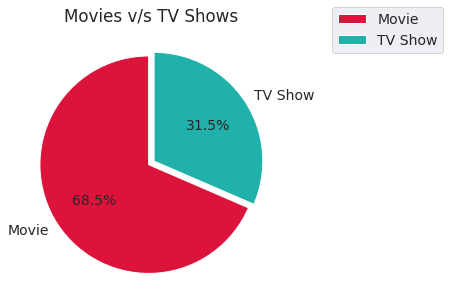

In [ ]:
plt.title("Movies v/s TV Shows")
plt.pie(netflix_df.type.value_counts(), explode=(0.03,0.03), labels=netflix_df.type.value_counts().index,autopct='%1.1f%%', colors=['crimson','lightseagreen'], startangle=90);
plt.legend(bbox_to_anchor=(1.6,1.1))
plt.show()

The above pie chart gave us a percentage distribution of Movies and TV shows on the platform. We can get a better idea about the numbers using a countplot. We'll use `seaborn's` `.countplot()` function for the same.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


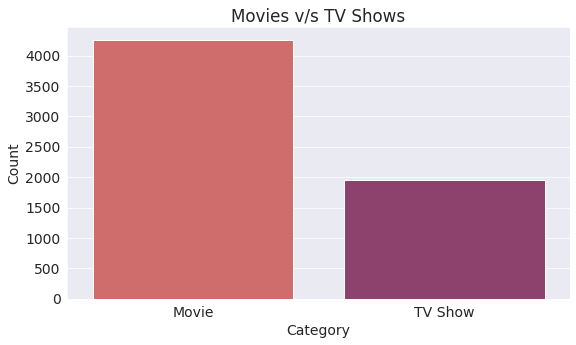

In [ ]:
sns.countplot(netflix_df.type,palette="flare");
plt.title("Movies v/s TV Shows")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

From the above plots we can understand that the number of Movies on Netflix is more than twice as that of TV Shows.

###**Countries** 

Let's look at the Top 25 countries with the most content on Netflix. We'll use a barplot for the same.

If we observe, value *'Unknown'* is present as an entry in the `country` column, which we don't want. Also, United states (and many other countries too) are recurring in the rest of the entries in the `country` column. Hence we need to make a series that counts and stores the count of every entry of a country.

We can exclude the *'Unknown'* label and use the `.split()` function to split the individual country names and `.stack()` function to make a new dataframe.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


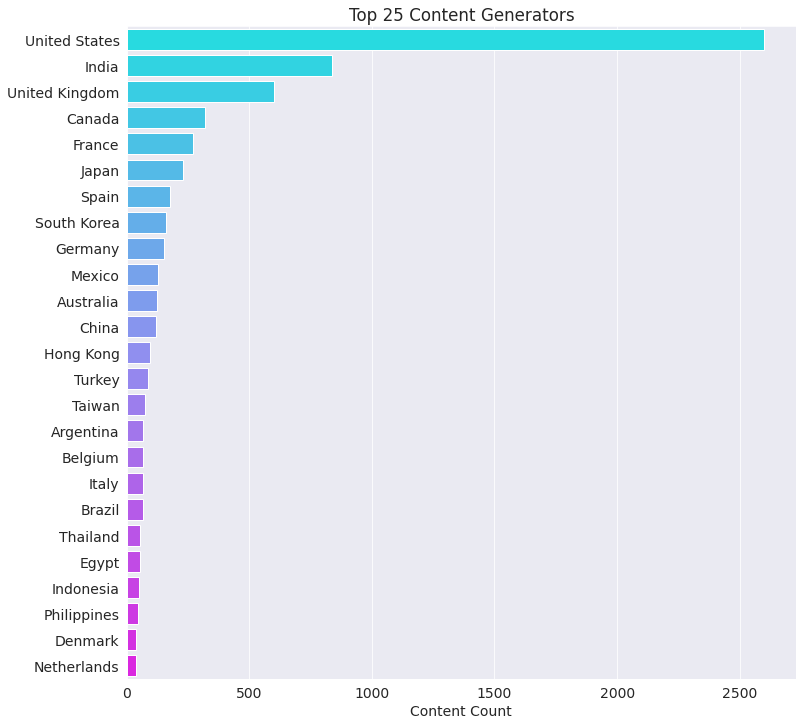

In [ ]:
countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack()
#drop the 2nd index
countries = countries.reset_index(level=1, drop=True)
countries = countries[countries != 'Unknown']

plt.figure(figsize=(12,12))
sns.barplot(countries.value_counts().head(25),countries.value_counts().head(25).index, palette="cool")
plt.title("Top 25 Content Generators");
plt.xlabel('Content Count');




In [ ]:
countries.value_counts()

United States     2600
India              838
United Kingdom     600
Canada             318
France             271
                  ... 
Syria                1
Ecuador              1
East Germany         1
Botswana             1
Liechtenstein        1
Length: 113, dtype: int64

As seen above, most of the content on Netflix originates in The **United States**. **India** and The **United Kingdom** lag behind by a huge margin.

###**Release years**

Let's see the distribution of release years of Movies and TV Shows on Netflix.

In [ ]:
netflix_df.release_year.value_counts().head(8)

2018    1062
2017     957
2019     843
2016     828
2015     510
2014     288
2013     235
2012     182
Name: release_year, dtype: int64

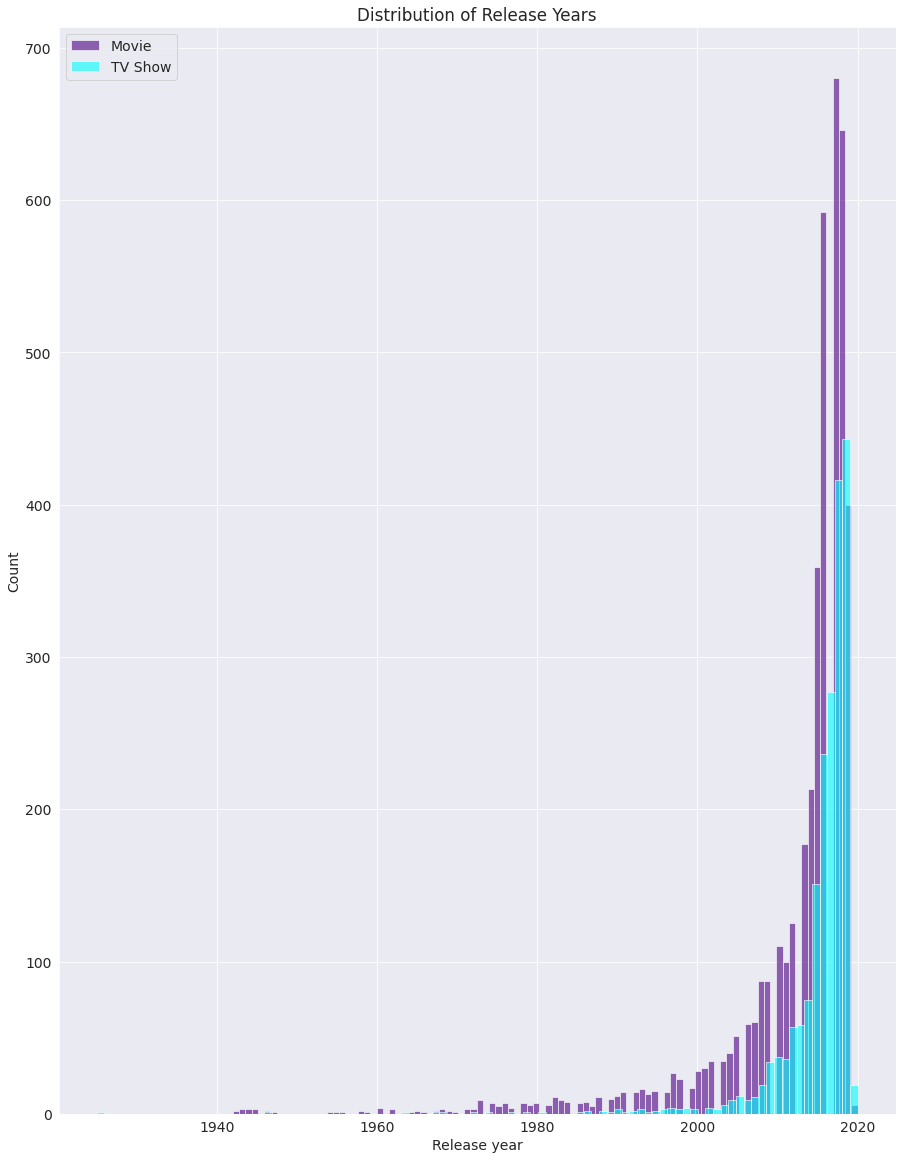

In [ ]:
plt.figure(figsize=(15,20))
plt.hist(netflix_df[netflix_df.type=='Movie'].release_year, alpha=0.6, color='indigo',bins=100)
plt.hist(netflix_df[netflix_df.type=='TV Show'].release_year,alpha =0.6, color='cyan',bins=100)
plt.xlabel('Release year')
plt.title("Distribution of Release Years")
plt.ylabel('Count')
plt.legend(['Movie','TV Show'])  
plt.show();

The plot conveys that a vast **majority** of the Movies/TV Shows on the platfom are those released between the timespan of around **2015-2020**. There are very few Movies and TV Shows on Netflix that belonging to the timeframe of 1940-2000.  

###**Ratings** 

Let's see how ratings of Movies and TV Shows on Netflix compare with each other. We'll use a countplot for the same.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


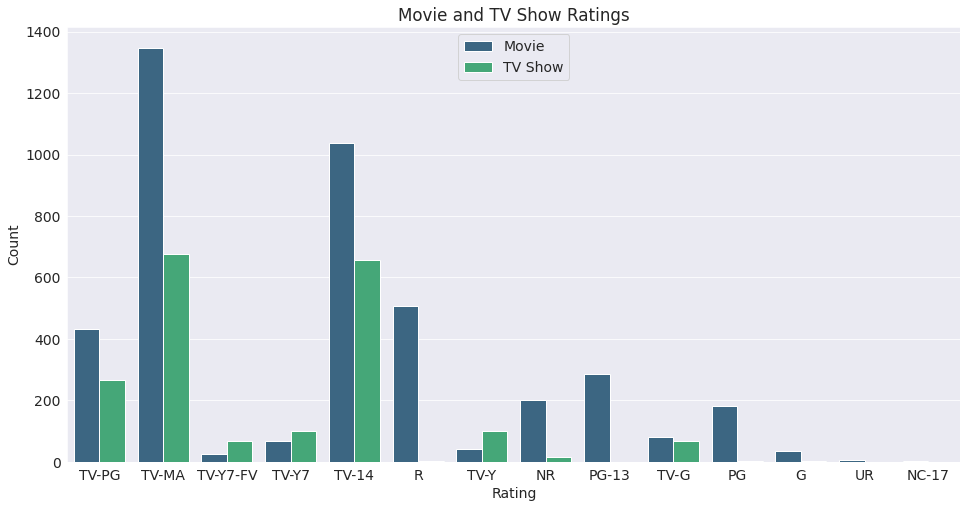

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot('rating',data=netflix_df, hue='type',palette='viridis' )
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(['Movie','TV Show'])
plt.title('Movie and TV Show Ratings')
plt.show();

As seen above, **TV-MA**, **TV-14**, and **TV-PG** are the Top 3 ratings in both Movie and TV Shows categories. TV Shows of certain ratings like **G**, **PG**, **R** aren't present. The graph gives an idea of the count of the number of shows with a particular kind of rating.

###**Duration** 

Let's check the distribution of duration of Movies on Netflix. We'll use `seaborn`'s `distplot` for the same.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


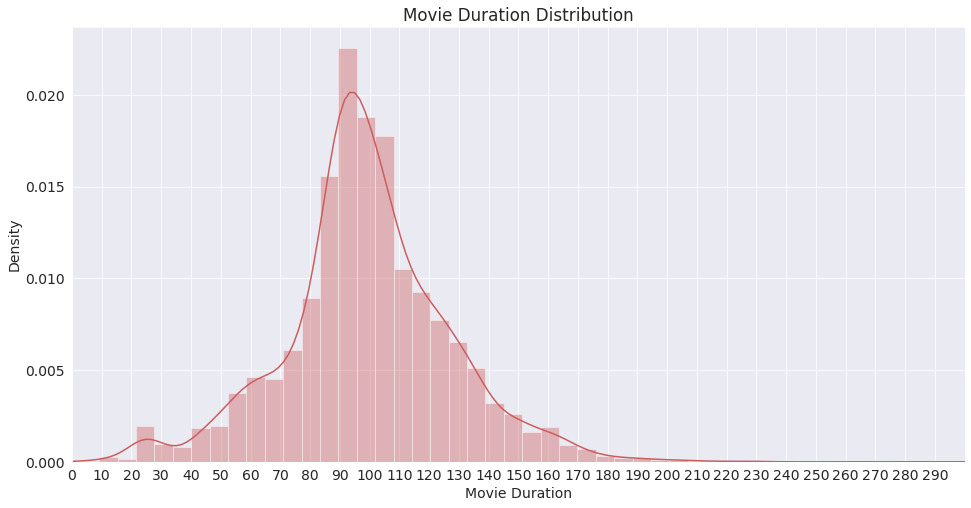

In [ ]:
duration = netflix_df[netflix_df.duration != '']['duration']
duration

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.distplot(duration, ax=ax,color='indianred')
plt.xlabel('Movie Duration')
ax.set_xlim(0,300)
ax.set_xticks(np.arange(0,300,10))
plt.title('Movie Duration Distribution')
plt.show();


As we see above, most of the Movies have a duration of around **90-100** minutes. A vast majority of the movies have a duration in the range (80,120)

## Asking and Answering Questions

Let's try asking some interesting questions about the chosen dataset and finding answers for the same. 

We might need to make comparisons between Movies and TV Shows. So making separate datasets for both will be convenient. 


In [ ]:
movies_df = netflix_df[netflix_df['type']=='Movie'].copy()
movies_df = movies_df.reset_index(drop=True)
shows_df = netflix_df[netflix_df['type']=='TV Show'].copy()
shows_df = shows_df.reset_index(drop=True)
movies_df.head(10)
shows_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
0,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018,9,1
1,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9,1
2,80163890,TV Show,Apaches,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017,9,1
3,80117902,TV Show,Fire Chasers,Unknown,Unknown,United States,2017-09-08,2017,TV-MA,,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017,9,1
4,80244601,TV Show,Castle of Stars,Unknown,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Unknown,2018-09-07,2015,TV-14,,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,2018,9,1
5,80190843,TV Show,First and Last,Unknown,Unknown,Unknown,2018-09-07,2018,TV-MA,,Docuseries,Take an intimate look at the emotionally charg...,2018,9,1
6,80221550,TV Show,Archibald's Next Big Thing,Unknown,"Tony Hale, Rosamund Pike, Jordan Fisher, Chels...",Unknown,2019-09-06,2019,TV-Y7,,"Kids' TV, TV Comedies",Happy-go-lucky chicken Archibald may not remem...,2019,9,1
7,80178151,TV Show,The Spy,Unknown,"Sacha Baron Cohen, Noah Emmerich, Hadar Ratzon...",France,2019-09-06,2019,TV-MA,,"International TV Shows, TV Dramas, TV Thrillers","In the 1960s, Israeli clerk-turned-secret agen...",2019,9,1
8,80113482,TV Show,No Tomorrow,Unknown,"Joshua Sasse, Tori Anderson, Jonathan Langdon,...",United States,2017-09-05,2016,TV-14,,"Romantic TV Shows, TV Comedies, TV Dramas",Her straitjacketed life turned topsy-turvy by ...,2017,9,1
9,80113641,TV Show,Frequency,Unknown,"Peyton List, Riley Smith, Mekhi Phifer, Devin ...",United States,2017-09-04,2016,TV-14,,"Crime TV Shows, TV Dramas, TV Mysteries",A detective seizes a precious opportunity to c...,2017,9,1


Now that we have made designated dataframes, let's get to answering some questions based on the dataset.

#### Q1: What is the trend in Movie and TV show content growth on Netflix over the years?

As we all know, more and more content is getting uplaoded on the platform with every passing year. To get an idea of how exactly the trend is, we'll use a heatmap with month and year added as parameters. 

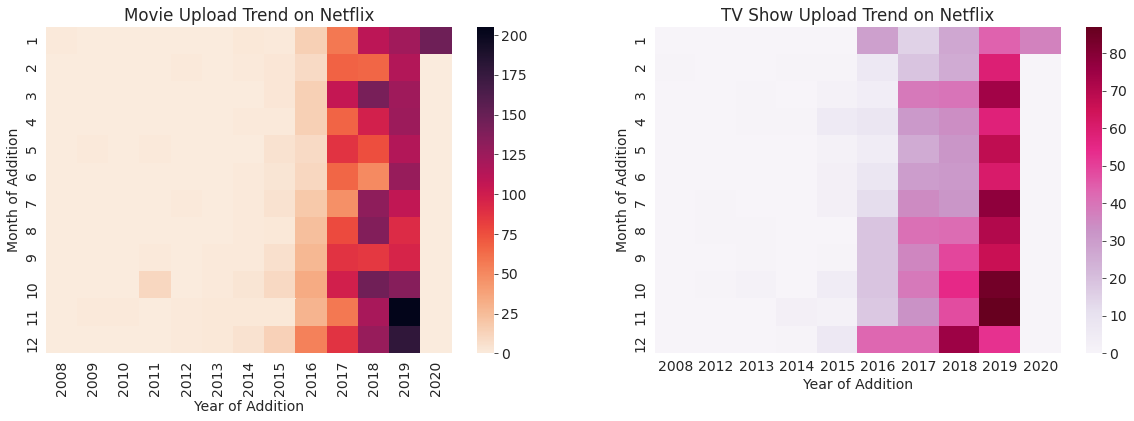

In [ ]:
movies_added = movies_df.groupby('month_added')['year_added'].value_counts()
movies_added = movies_added.unstack()#.T
#fill Nan with 0
movies_added = movies_added.fillna(0)
movies_added

series_added = shows_df.groupby('month_added')['year_added'].value_counts()
series_added = series_added.unstack()#.T
#fill Nan with 0
series_added = series_added.fillna(0)
series_added

#trend in Movies
fig, axes = plt.subplots(1, 2, figsize=(20,6))

axes[0].set_title('Movie Upload Trend on Netflix')
sns.heatmap(movies_added,cmap='rocket_r', ax=axes[0])
axes[0].set_xlabel('Year of Addition')
axes[0].set_ylabel('Month of Addition')


#trend in TV Shows
axes[1].set_title('TV Show Upload Trend on Netflix')
sns.heatmap(series_added,cmap='PuRd')
axes[1].set_xlabel('Year of Addition')
axes[1].set_ylabel('Month of Addition')
plt.show();



As seen from the above graphs, we notice that the amount of content (Movies and TV Shows) being added onto the platform goes on increasing with every year, of course the numbers in both cases vary.The trend in Month of upload seems to be a bit more random compared to year of upload.

Note that the data used shows trends till the start of 2020, hence zero uplaods being noted post January. Projecting the above trend to continue over a few years in the future, we can expect the content to increase even more in the upcoming years with more and more people shifitng to OTTs to satisfy their entertainment needs. 

#### Q2:Who are the Top 10 Directors under Movies and TV Shows featured on Netflix (based on number of shows) ?

In [ ]:
#filter out director entires with value 'Unknown'
directors_movies = movies_df[movies_df.director != 'Unknown'].set_index('title')    
#since the numerical index keeps repeating we set the index to the movie title
directors_movies = directors_movies.director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
directors_movies.head(20)

directors_shows = shows_df[shows_df.director != 'Unknown'].set_index('title')    
#since the numerical index keeps repeating we set the index to the show title
directors_shows = directors_shows.director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
directors_shows.head(20)


title
Criminal: Spain                                           Mariano Barroso
The Hockey Girls                                       Kiko Cruz Claverol
The Hockey Girls                                            Patricia Font
The Five                                                    Mark Tonderai
Age of Rebellion                                                 Peter Ho
Nowhere Man                                                       DJ Chen
Bring It On, Ghost                                          Park Joon-hwa
Black Money Love                                           Ahmet Katıksız
Harry & Bunnie                                                   Ah Loong
FIGHTWORLD                                               Padraic McKinley
The Blue Planet: A Natural History of the Oceans      Alastair Fothergill
Cheese in the Trap                                          Lee Yoon-jung
Kingdoms of the Sky                                       Steve Greenwood
Old Money                       

Let's use a countplot to arrange directors in order of their number of shows.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


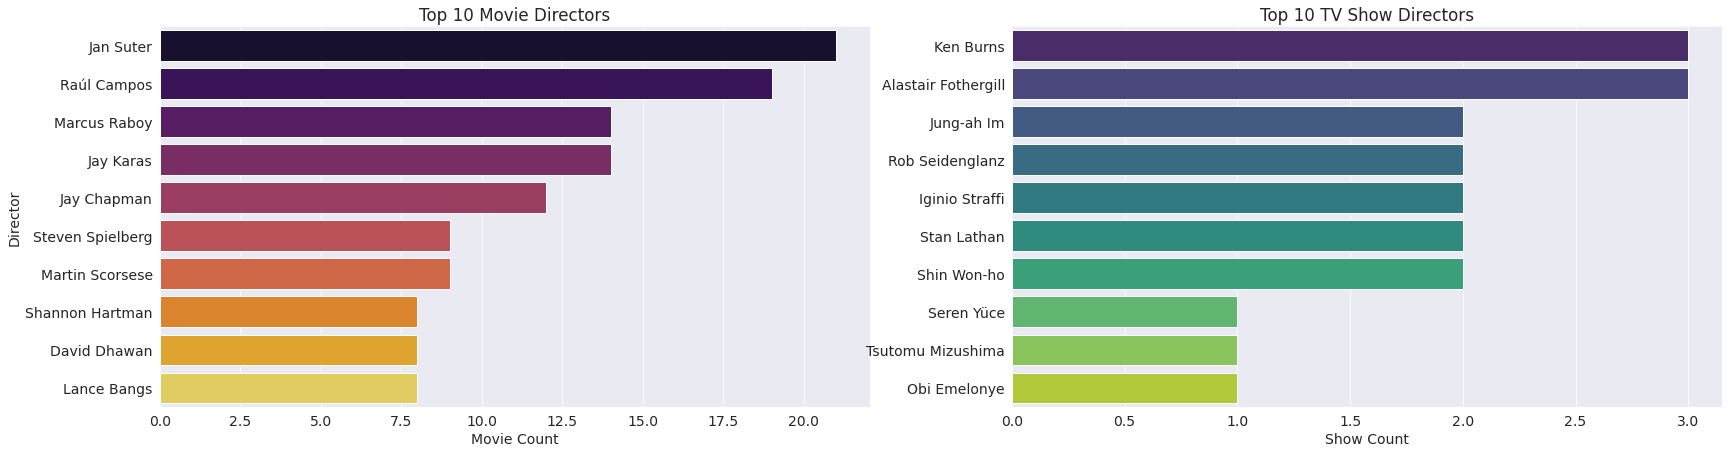

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(28,7))

#top 10 featured directors in Movies
axes[0].set_xlabel('Movie Count')
axes[0].set_ylabel('Director')
axes[0].set_title('Top 10 Movie Directors')
sns.barplot(directors_movies.value_counts().head(10), directors_movies.value_counts().head(10).index,palette='inferno', ax=axes[0]);


#Top 10 featured directors in TV Shows
axes[1].set_xlabel('Show Count')
axes[1].set_title('Top 10 TV Show Directors')
sns.barplot(directors_shows.value_counts().head(10), directors_shows.value_counts().head(10).index,palette='viridis', ax=axes[1]);
plt.show();


The above mentioned are the top 10 Directors in Movies and TV Shows respectively. 

#### Q3: Who are the Top 20 Actors featured on Netflix (based on number of shows) ?

In [ ]:
#filter out cast entires with value 'Unknown'
cast_movies = movies_df[movies_df.cast != 'Unknown'].set_index('title')    
#since the numerical index keeps repeating we set the index to the movie title
cast_movies = cast_movies.cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
cast_movies.head(20)

cast_shows = shows_df[shows_df.cast != 'Unknown'].set_index('title')    
#since the numerical index keeps repeating we set the index to the show title
cast_shows = cast_shows.cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
cast_shows.head(20)

title
Transformers Prime                              Peter Cullen
Transformers Prime                           Sumalee Montano
Transformers Prime                              Frank Welker
Transformers Prime                             Jeffrey Combs
Transformers Prime                  Kevin Michael Richardson
Transformers Prime                              Tania Gunadi
Transformers Prime                               Josh Keaton
Transformers Prime                                Steve Blum
Transformers Prime                               Andy Pessoa
Transformers Prime                              Ernie Hudson
Transformers Prime                              Daran Norris
Transformers Prime                              Will Friedle
Transformers: Robots in Disguise                Will Friedle
Transformers: Robots in Disguise                Darren Criss
Transformers: Robots in Disguise            Constance Zimmer
Transformers: Robots in Disguise                Khary Payton
Transformers: Robo

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


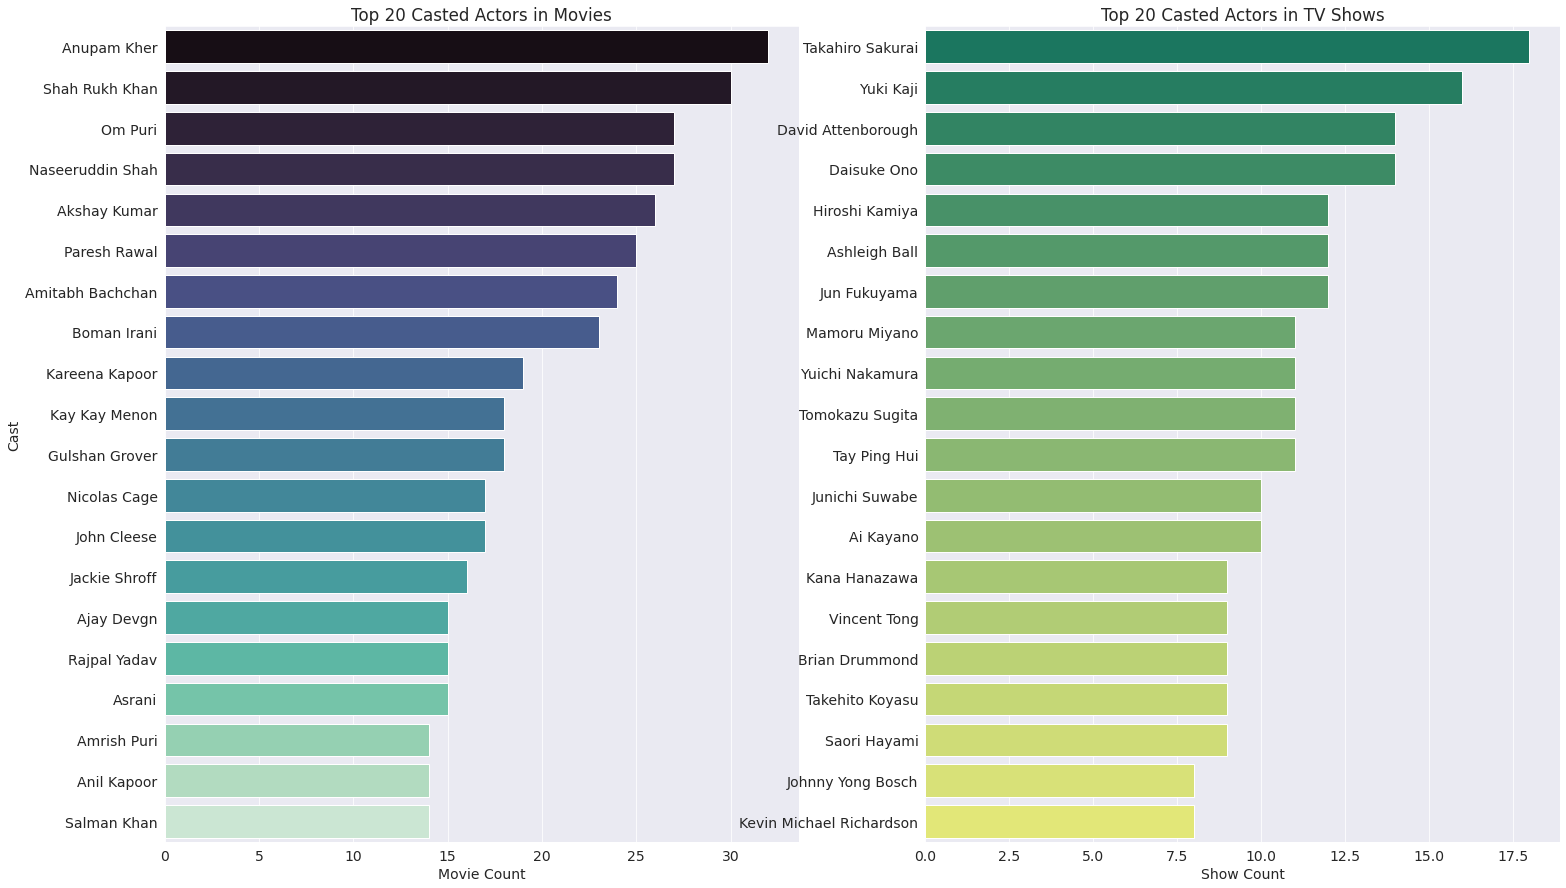

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25,15))

#top 10 featured directors in Movies
axes[0].set_xlabel('Movie Count')
axes[0].set_ylabel('Cast')
axes[0].set_title('Top 20 Casted Actors in Movies')
sns.barplot(cast_movies.value_counts().head(20), cast_movies.value_counts().head(20).index,palette='mako', ax=axes[0]);


#Top 10 featured directors in TV Shows
axes[1].set_xlabel('Show Count')
axes[1].set_title('Top 20 Casted Actors in TV Shows')
sns.barplot(cast_shows.value_counts().head(20), cast_shows.value_counts().head(20).index,palette='summer', ax=axes[1]);
plt.show();

The above mentioned are the top 20 Actors in Movies and TV Shows respectively. 

#### Q4: Which are the most Popular Movie and TV Genres on Netflix?

In [ ]:
#filter out cast entires with value 'Unknown'
genre_movies = movies_df.set_index('title')    
#since the numerical index keeps repeating we set the index to the movie title
genre_movies = genre_movies.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre_movies.head(20)

genre_shows = shows_df[shows_df.cast != 'Unknown'].set_index('title')    
#since the numerical index keeps repeating we set the index to the show title
genre_shows = genre_shows.listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre_shows.head(20)

title
Transformers Prime                                   Kids' TV
Transformers: Robots in Disguise                     Kids' TV
Apaches                                        Crime TV Shows
Apaches                                International TV Shows
Apaches                             Spanish-Language TV Shows
Castle of Stars                        International TV Shows
Castle of Stars                             Romantic TV Shows
Castle of Stars                                   TV Comedies
Archibald's Next Big Thing                           Kids' TV
Archibald's Next Big Thing                        TV Comedies
The Spy                                International TV Shows
The Spy                                             TV Dramas
The Spy                                          TV Thrillers
No Tomorrow                                 Romantic TV Shows
No Tomorrow                                       TV Comedies
No Tomorrow                                         TV Dramas
Fr

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


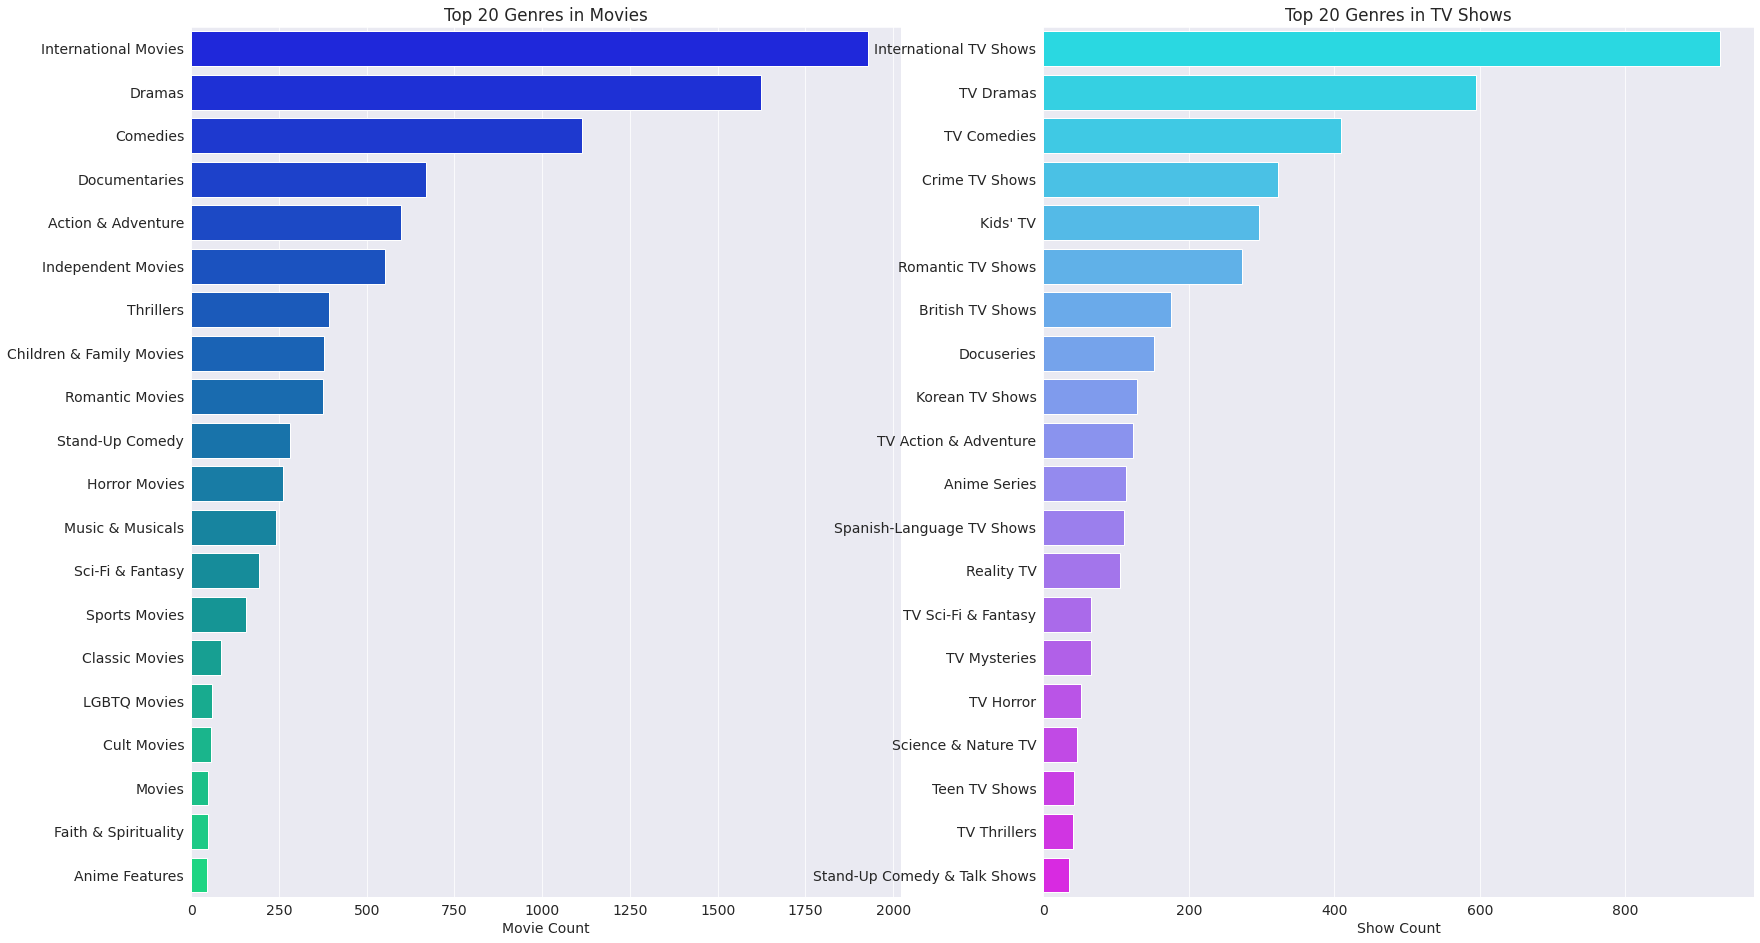

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(28,16))

#top 10 featured directors in Movies
axes[0].set_xlabel('Movie Count')
axes[0].set_title('Top 20 Genres in Movies')
sns.barplot(genre_movies.value_counts().head(20), genre_movies.value_counts().head(20).index,palette='winter', ax=axes[0]);


#Top 10 featured directors in TV Shows
axes[1].set_xlabel('Show Count')
axes[1].set_title('Top 20 Genres in TV Shows')
sns.barplot(genre_shows.value_counts().head(20), genre_shows.value_counts().head(20).index,palette='cool', ax=axes[1]);
plt.show();

As seen above, the genres **International**, **Drama** and **Comedy** are the top 3 in both Movies and TV Shows. Post these, the statistics differ. 

#### Q5: Analyse the growth of American Movies and TV Shows on Netflix over the years.

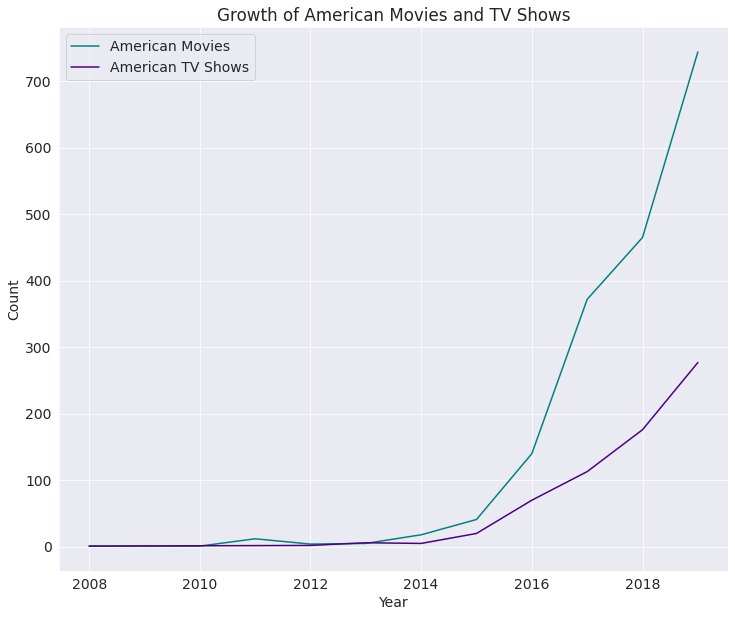

In [ ]:
us_mov_df = movies_df[movies_df['country'].str.contains('United States')]
us_mov_year = us_mov_df['year_added'].value_counts().to_frame()
us_mov_year = us_mov_year.reset_index().rename(columns={'index': 'year','year_added':'count'})
#since we dont have data for the entire year of 2020 we'll drop it's entry
us_mov_year = us_mov_year[us_mov_year.year != 2020]
us_mov_year=us_mov_year.sort_values(by='year').reset_index().drop('index',axis=1)
us_mov_year

us_tv_df = shows_df[shows_df['country'].str.contains('United States')]
us_tv_year = us_tv_df['year_added'].value_counts().to_frame()
us_tv_year = us_tv_year.reset_index().rename(columns={'index': 'year','year_added':'count'})
#since we dont have data for the entire year of 2020 we'll drop it's entry
us_tv_year = us_tv_year[us_tv_year.year != 2020]
us_tv_year=us_tv_year.sort_values(by='year').reset_index().drop('index',axis=1)
us_tv_year

plt.figure(figsize=(12,10))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Growth of American Movies and TV Shows')
plt.plot(us_mov_year.year,us_mov_year['count'], color='teal')
plt.plot(us_tv_year.year,us_tv_year['count'],color='indigo')
plt.legend(['American Movies','American TV Shows']);

As we see above, the number of both, Movies as well as TV Shows, are **increasing** over the years. THe increase was gradual till around 2015 but became exponential since 2015.

 A similar growth can be projected to future years considering the current shift to OTT platforms. We can expect content from all over the World to increase in count on the platform.

## Inferences and Conclusion



*   Netflix as one of the most popular OTT platforms, is showing exponential growth in it's content over the years
*   More that half the content (**68.5%**) on Netflix comprises of **Movies**. The rest of the content are TV Shows.
* The United States, India, Canada, France and Japan are the top contributers of Netflix content.
* A vast majority of content available on Netflix belong to recent years
* **TV-MA**, **TV-14**, and **TV-PG** are the Top 3 ratings in both Movie and TV Shows categories
*  A vast majority of the movies have a duration between 80 to 120 minutes
*  The genres **International**, **Drama** and **Comedy** are the top 3 in both Movies and TV Shows.

In the upcoming years, we can definitely expect a growth in Netflix's content, contetn from different countries and the Number of TV Shows to increase in perventage compared to current figures. We can also expect new genres, ratings, directors and cast to come into the limelight.



## References and Future Work





Here are some of the resources i found useful for this project

*  [Data Analysis with Python: Zero to Pandas
](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas) 
*   [ Visualization with Matplotlib and Seaborn
](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn)
* [Exploratory Data Analysis - A Case Study
](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study)
* https://www.kaggle.com/shivamb/netflix-shows
* https://matplotlib.org/3.3.2/tutorials/index.html
* https://seaborn.pydata.org/tutorial.html
* https://pandas.pydata.org/docs/user_guide/index.html

This data is very informative and can be constantly updated with more recent information in order to expand the timeframe of our analysis. A **Movie/TV Show Recommendation analysis** could be a future project.

